<a href="https://colab.research.google.com/github/YKiat/Stock-Exchange-Data-Kaggle-/blob/main/Stock_Exchange_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
stocks_data = pd.read_csv('/content/indexData.csv')

See how the data distributed in columns 


In [ ]:
stocks_data.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


Checking the data dimensions, null value, and shape

In [ ]:
stocks_data.shape

(112457, 8)

In [ ]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


From the info above, we could see there is 112457-110253 = 2204 null entries/rows

Removing null in the data 

In [ ]:
stocks_data = stocks_data.dropna()

In [ ]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110253 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      110253 non-null  object 
 1   Date       110253 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 7.6+ MB


In [ ]:
stocks_data.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


Read the indexinfo data to have a look what does the Index column here means 

In [ ]:
indexinfo = pd.read_csv('/content/indexInfo.csv')

In [ ]:
indexinfo.head()

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY


In [ ]:
indexinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    14 non-null     object
 1   Exchange  14 non-null     object
 2   Index     14 non-null     object
 3   Currency  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [ ]:
stocks_index = stocks_data.merge(indexinfo,on='Index')

In [ ]:
stocks_index.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Region,Exchange,Currency
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,New York Stock Exchange,USD
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,New York Stock Exchange,USD
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,New York Stock Exchange,USD
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,New York Stock Exchange,USD
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,New York Stock Exchange,USD


In [ ]:
stocks_index['Currency'].unique()

array(['USD', 'HKD', 'CNY', 'CAD', 'INR', 'EUR', 'KRW', 'CHF', 'TWD',
       'ZAR', 'JPY'], dtype=object)

In [ ]:
afterprocess = pd.read_csv('/content/indexProcessed.csv')

In [ ]:
afterprocess.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


Can find the exchange rate directly from the afterprocess file by using Close/Close Usd, a exchange rate will be return 

In [ ]:
afterprocess['Exchanged Rate to USD'] = afterprocess['Close']/afterprocess['CloseUSD']

In [ ]:
afterprocess.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Exchanged Rate to USD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006,7.692308
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013,7.692308
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987,7.692308
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987,7.692308
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013,7.692308


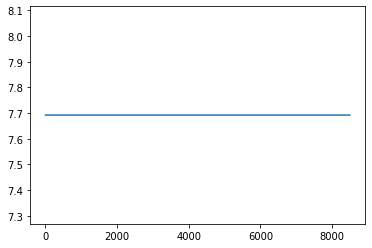

In [ ]:
HSI = afterprocess[afterprocess['Index']=='HSI']
plt.plot(HSI['Exchanged Rate to USD'])

It's very weird for a currency that it doesn't floating and remain on the same point, hence we can have a guess it might be using the currency that this database is created rather than the online version of currency exchange rate, but we can try out one more to examine our thoughts 

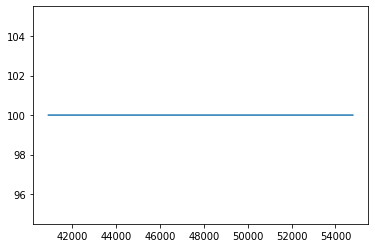

In [ ]:
N225= afterprocess[afterprocess['Index']=='N225']
plt.plot(N225['Exchanged Rate to USD'])

In [ ]:
rates = {}
for x in indexinfo.Index.tolist():
    indexname = afterprocess[afterprocess.Index==x]
    values = indexname['Exchanged Rate to USD'].values
    name = '{}_USD'.format(indexinfo[indexinfo.Index == x].Currency.values[0])
    if name not in rates:
        if len(values) > 0:
            rates[name] = values[0]
            print('{0}:{1}'.format(name, float(values[0])))
        else:
            rates[name] = 'NaN'
            print('{0}:{1}'.format(name, 'NaN'))
    else:
        pass

USD_USD:1.0
HKD_USD:7.692307692307692
CNY_USD:6.249999999999999
JPY_USD:100.0
EUR_USD:0.819672131147541
CAD_USD:1.2048192771084336
INR_USD:99.99999999999997
KRW_USD:NaN
CHF_USD:0.9009009009009008
TWD_USD:25.0
ZAR_USD:14.285714285714288


In [ ]:
stocks_index = stocks_index.sort_values(by='Index',ascending=True)

In [ ]:
idx =sorted(stocks_index.Index.unique().tolist())
idx

['000001.SS',
 '399001.SZ',
 'GDAXI',
 'GSPTSE',
 'HSI',
 'IXIC',
 'J203.JO',
 'KS11',
 'N100',
 'N225',
 'NSEI',
 'NYA',
 'SSMI',
 'TWII']

In [ ]:
exchange_rates = [6.249999999999999,6.249999999999999,0.819672131147541,1.2048192771084336,7.692307692307692,
                  1.0,14.285714285714288,0,0.819672131147541,100.0,99.99999999999997,1.0,0.9009009009009008,
                  25.0]

In [ ]:
exchange_rates[2]

0.819672131147541

In [ ]:
len(exchange_rates)

14

In [ ]:
stocks_index = stocks_index.reset_index(drop=True)

In [ ]:
stocks_index['Close (USD)'] = 0 

In [ ]:
num = exchange_rates
for i in range(len(stocks_index)):
    if stocks_index.iloc[i,0] == '000001.SS': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[0]
    elif stocks_index.iloc[i,0] == '399001.SZ': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[1]
    elif stocks_index.iloc[i,0] == 'GDAXI': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[2]
    elif stocks_index.iloc[i,0] == 'GSPTSE': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[3]
    elif stocks_index.iloc[i,0] == 'HSI': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[4]
    elif stocks_index.iloc[i,0] == 'IXIC': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[5]
    elif stocks_index.iloc[i,0] == 'J203.JO': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[6]
    elif stocks_index.iloc[i,0] == 'KS11': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[7]
    elif stocks_index.iloc[i,0] == 'N100': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[8]
    elif stocks_index.iloc[i,0] == 'N225': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[9]
    elif stocks_index.iloc[i,0] == 'NSEI': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[10]
    elif stocks_index.iloc[i,0] == 'NYA': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[11]
    elif stocks_index.iloc[i,0] == 'SSMI': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[12]
    elif stocks_index.iloc[i,0] == 'TWII': 
      stocks_index.iloc[i,11] = stocks_index.iloc[i,5] / num[13]


    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
stocks_index.sort_values(by=['Index','Date'])

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Region,Exchange,Currency,Close (USD)
2895,000001.SS,1997-07-02,1255.909058,1261.571045,1147.331055,1199.061035,1199.061035,0.0,China,Shanghai Stock Exchange,CNY,191.849766
3863,000001.SS,1997-07-03,1194.676025,1194.676025,1149.939941,1150.623047,1150.623047,0.0,China,Shanghai Stock Exchange,CNY,184.099688
3862,000001.SS,1997-07-04,1138.921021,1163.249023,1124.776001,1159.342041,1159.342041,0.0,China,Shanghai Stock Exchange,CNY,185.494727
3861,000001.SS,1997-07-07,1161.707031,1163.447021,1085.572021,1096.818970,1096.818970,0.0,China,Shanghai Stock Exchange,CNY,175.491035
3860,000001.SS,1997-07-08,1092.798950,1115.432983,1066.043945,1109.666016,1109.666016,0.0,China,Shanghai Stock Exchange,CNY,177.546563
...,...,...,...,...,...,...,...,...,...,...,...,...
106337,TWII,2021-05-25,16444.750000,16657.599610,16444.750000,16595.669920,16595.669920,9038500.0,Taiwan,Taiwan Stock Exchange,TWD,663.826797
106336,TWII,2021-05-26,16645.169920,16706.289060,16523.230470,16643.689450,16643.689450,6816100.0,Taiwan,Taiwan Stock Exchange,TWD,665.747578
106335,TWII,2021-05-27,16591.699220,16601.609380,16419.419920,16601.609380,16601.609380,8532000.0,Taiwan,Taiwan Stock Exchange,TWD,664.064375
106334,TWII,2021-05-28,16690.039060,16889.009770,16690.039060,16870.859380,16870.859380,8549300.0,Taiwan,Taiwan Stock Exchange,TWD,674.834375


In [ ]:
stocks_index['Date'] = pd.to_datetime(stocks_index['Date'])


In [ ]:
stocks_index = stocks_index.sort_values(by=['Index','Date'],ascending=[True,True])

In [ ]:
stocks_index = stocks_index.reset_index(drop=True)

In [ ]:
stocks_index = stocks_index[stocks_index['Index'] != 'KS11' ]
stocks_index = stocks_index.drop(columns=['Region','Exchange','Currency'])

In [ ]:
stocks_index

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Close (USD)
0,000001.SS,1997-07-02,1255.909058,1261.571045,1147.331055,1199.061035,1199.061035,0.0,191.849766
1,000001.SS,1997-07-03,1194.676025,1194.676025,1149.939941,1150.623047,1150.623047,0.0,184.099688
2,000001.SS,1997-07-04,1138.921021,1163.249023,1124.776001,1159.342041,1159.342041,0.0,185.494727
3,000001.SS,1997-07-07,1161.707031,1163.447021,1085.572021,1096.818970,1096.818970,0.0,175.491035
4,000001.SS,1997-07-08,1092.798950,1115.432983,1066.043945,1109.666016,1109.666016,0.0,177.546563
...,...,...,...,...,...,...,...,...,...
110248,TWII,2021-05-25,16444.750000,16657.599610,16444.750000,16595.669920,16595.669920,9038500.0,663.826797
110249,TWII,2021-05-26,16645.169920,16706.289060,16523.230470,16643.689450,16643.689450,6816100.0,665.747578
110250,TWII,2021-05-27,16591.699220,16601.609380,16419.419920,16601.609380,16601.609380,8532000.0,664.064375
110251,TWII,2021-05-28,16690.039060,16889.009770,16690.039060,16870.859380,16870.859380,8549300.0,674.834375
